 ### Traducción a modelos de regresión

Inicializamos la estimación con el porcentaje de 1s

   $$
   p = \frac{\text{Número de observaciones en la clase positiva}}{\text{Total de observaciones}}
   $$

A su vez, obtenemos el log odds 

   $$
   F_0 = \log\left(\frac{p}{1 - p}\right)
   $$



Repita hasta converger
- Hacemos un loop (total de árboles) en cada pasao obtenemos los _residuales_ (valor real - valor predicho)

   $r_i = p_i - y_i$

- Ajustamos un árbol de regresión para predecir los residuales 
- La prediccion en cada árbol es
    $$
    \gamma_j = \frac{\sum \text{Residuals}}{\sum_{i \in R_j} \text{Previous probability} (1 - \text{Previous probability})}
    $$

  Esta predicción está en termino de log odds

  
- modelo actualizado = modelo anterior + $\nu$ nuevo árbol
$$F_m(x) = F_{m - 1}(x) + \nu (\text{nuevo árbol})$$

Esto nos da la predicción final 


- Obtenemos las probabilidades con la función sigmoide 

$$p_i = \frac{1}{1 + e^{-F_{m}(x_i)}}$$



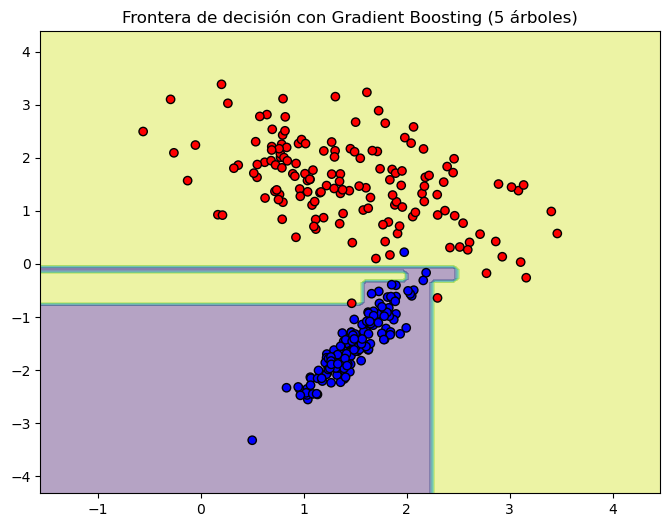

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay

# Crear datos sintéticos 2D
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Entrenar modelo de Gradient Boosting
model = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=10, random_state=42)
model.fit(X, y)

# Visualizar frontera de decisión
fig, ax = plt.subplots(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", alpha=0.4, ax=ax)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
ax.set_title("Frontera de decisión con Gradient Boosting (5 árboles)")
plt.show()


In [2]:
(0.34 + 0.34) / (0.66*(1-0.66) + 0.66*(1-0.66))

1.5151515151515154